In [ ]:
import pandas as pd 
import numpy as np
from pathlib import Path

In [ ]:
file_path = Path("machine_temp_failure_missing.csv")
df = pd.read_csv("/machine_temp_failure_missing.csv")
print(df.head())  
print(df.info())

          timestamp      value
0  02-12-2013 21:15  73.967322
1  02-12-2013 21:20  74.935882
2  02-12-2013 21:25  76.124162
3  02-12-2013 21:30  78.140707
4  02-12-2013 21:35  79.329836
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      21410 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB
None


In [ ]:
print("value:",df.isnull().sum())  

statistics = df.describe()
print(statistics)

df.rename(columns={'value': 'temperature'}, inplace=True)
print(df.head())

value: timestamp       0
value        1285
dtype: int64
              value
count  21410.000000
mean      85.968188
std       13.553070
min        2.084721
25%       83.082867
50%       89.251290
75%       93.910748
max      108.510543
          timestamp  temperature
0  02-12-2013 21:15    73.967322
1  02-12-2013 21:20    74.935882
2  02-12-2013 21:25    76.124162
3  02-12-2013 21:30    78.140707
4  02-12-2013 21:35    79.329836


In [ ]:
df['delta_temperature'] = df['temperature'].diff()

# Remove the first row since the difference for the first value is NaN
df = df.iloc[1:]
print(df.head())

          timestamp  temperature  delta_temperature
1  02-12-2013 21:20    74.935882           0.968560
2  02-12-2013 21:25    76.124162           1.188280
3  02-12-2013 21:30    78.140707           2.016546
4  02-12-2013 21:35    79.329836           1.189128
5  02-12-2013 21:40    78.710418          -0.619417


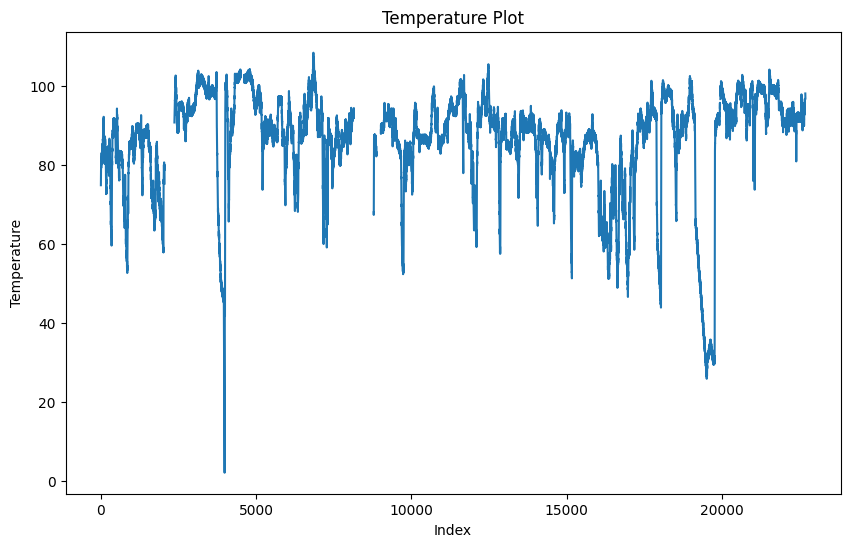

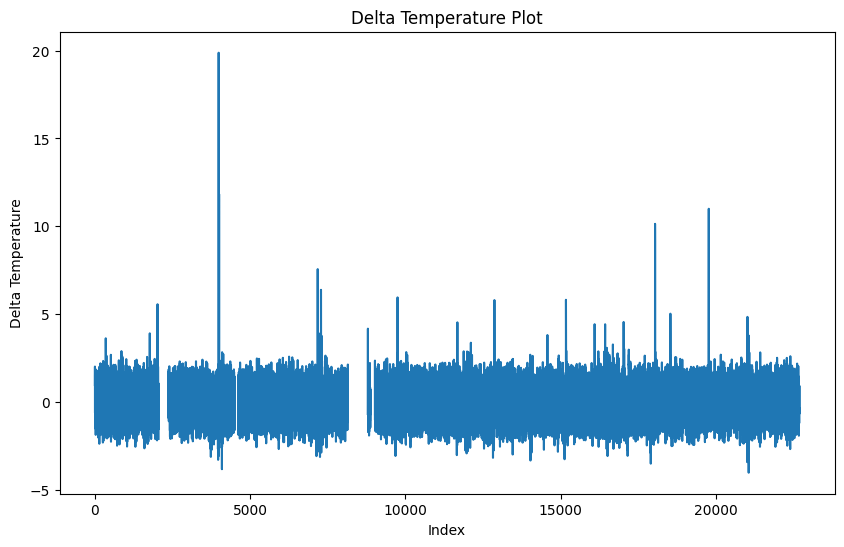

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['temperature'])
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Plot')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['delta_temperature'])
plt.xlabel('Index')
plt.ylabel('Delta Temperature')
plt.title('Delta Temperature Plot')
plt.show()

In [ ]:
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.3 MB/s eta 0:00:00


In [ ]:
import hvplot.pandas

# Plot temperature using hvPlot
x=df.hvplot.line(x='index', y='temperature', xlabel='Index', ylabel='Temperature', title='Temperature Plot', width=600, height=400)

# Plot delta_temperature using hvPlot
y=df.hvplot.line(x='index', y='delta_temperature', xlabel='Index', ylabel='Delta Temperature', title='Delta Temperature Plot', width=600, height=400)
x+y

:Layout
   .Curve.I  :Curve   [index]   (temperature)
   .Curve.II :Curve   [index]   (delta_temperature)

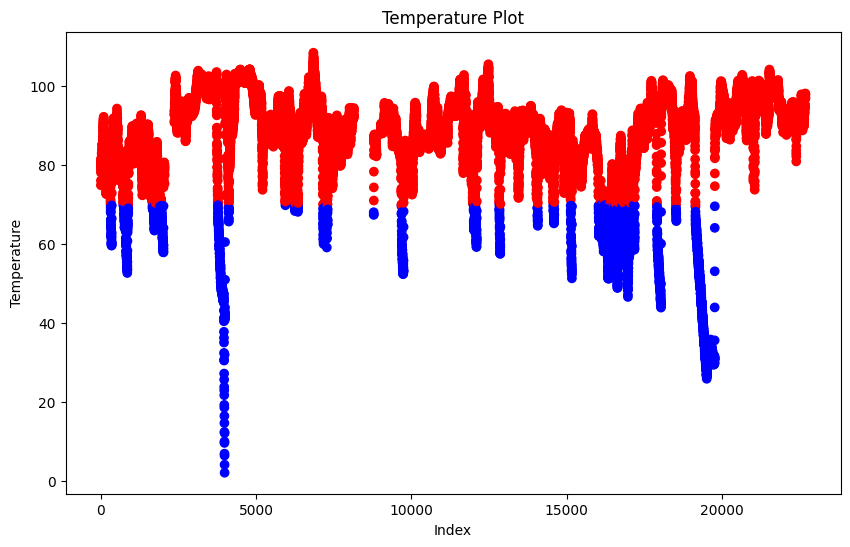

In [ ]:
plt.figure(figsize=(10, 6))

colors = ['red' if temp > 70.00 else 'blue' for temp in df['temperature']]

plt.scatter(df.index, df['temperature'], c=colors)

plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Plot')

plt.show()

In [ ]:
#Write three functions read_datasets(), plot_dfs(), rmse_score() for these datasets (as discussed in 1_4 notebook).


In [ ]:
df = pd.read_csv("/machine_temp_failure_original.csv")
print(df.head())  
print(df.info())

             timestamp      value
0  2013-12-02 21:15:00  73.967322
1  2013-12-02 21:20:00  74.935882
2  2013-12-02 21:25:00  76.124162
3  2013-12-02 21:30:00  78.140707
4  2013-12-02 21:35:00  79.329836
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      22695 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB
None


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
y_true = df['value']

# Imputation using Scikit-Learn (SimpleImputer) with interpolation
df_interpolate = df.copy()
imputer = SimpleImputer(strategy='constant', fill_value=None)
df_interpolate['value'] = imputer.fit_transform(df_interpolate['value'].values.reshape(-1, 1))
y_pred_interpolate = df_interpolate['value']

# Calculate the RMSE score for interpolation
rmse_interpolate = np.sqrt(mean_squared_error(y_true, y_pred_interpolate))

# Compare the RMSE scores and find the method with the least RMSE score
rmse_scores = {'Interpolation': rmse_interpolate}
min_rmse_method = min(rmse_scores, key=rmse_scores.get)

print("RMSE scores:")
for method, rmse in rmse_scores.items():
    print(f"{method}: {rmse}")

print(f"\nThe method with the least RMSE score is: {min_rmse_method} ({rmse_scores[min_rmse_method]})")

RMSE scores:
Interpolation: 0.0

The method with the least RMSE score is: Interpolation (0.0)


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the 'datetime' column as the index
df.set_index('timestamp', inplace=True)

# Check the current frequency of the data
current_freq = pd.infer_freq(df.index)
print("Current Frequency:", current_freq)

# Resample the dataset to hourly frequency
df_hourly = df.resample('H').mean()

# Check the frequency of the resampled data
hourly_freq = pd.infer_freq(df_hourly.index)
print("Hourly Frequency:", hourly_freq)

Current Frequency: None
Hourly Frequency: H


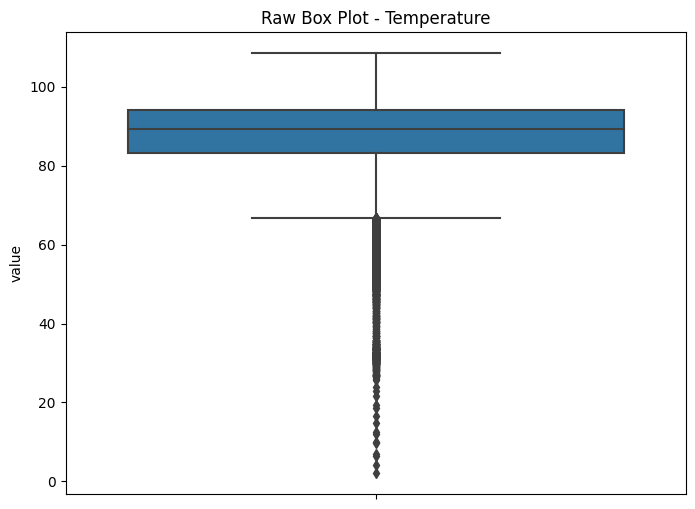

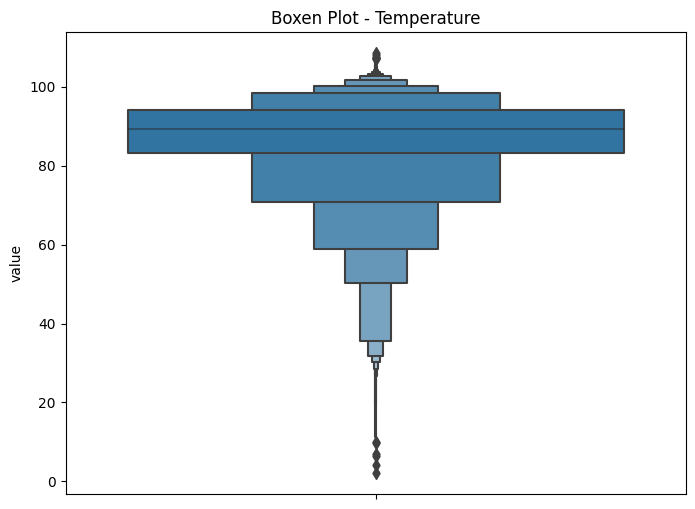

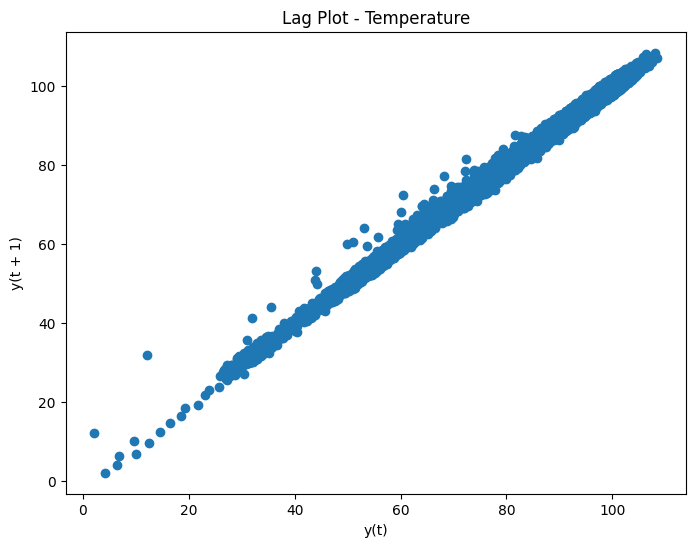

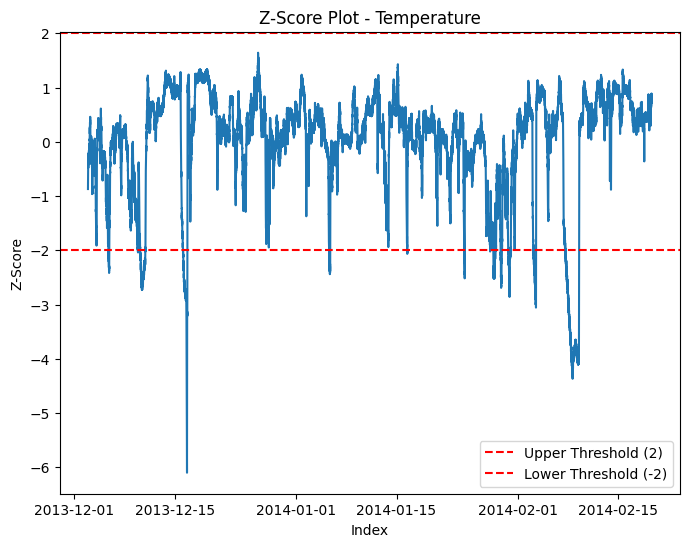

Outliers using IQR method:
                         value
timestamp                     
2013-12-03 23:55:00  65.906496
2013-12-04 00:00:00  66.204651
2013-12-04 00:05:00  66.094398
2013-12-04 00:10:00  64.925151
2013-12-04 00:15:00  65.910542
...                        ...
2014-02-09 11:45:00  30.975528
2014-02-09 11:50:00  35.624129
2014-02-09 11:55:00  43.971303
2014-02-09 12:00:00  53.135749
2014-02-09 12:05:00  64.134769

[2298 rows x 1 columns]


In [ ]:
import seaborn as sns
from scipy.stats import zscore

# Generate a raw box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='value')
plt.title('Raw Box Plot - Temperature')
plt.show()

# Generate a boxen plot
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df, y='value')
plt.title('Boxen Plot - Temperature')
plt.show()

# Generate a lag plot
plt.figure(figsize=(8, 6))
pd.plotting.lag_plot(df['value'])
plt.title('Lag Plot - Temperature')
plt.show()


# Define the iqr_outliers function
def iqr_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Find outliers using IQR method
outliers_iqr = iqr_outliers(df, 'value')

# Compute z-score
df['z_score'] = zscore(df['value'])

# Plot z-score
plt.figure(figsize=(8, 6))
plt.plot(df['z_score'])
plt.axhline(y=2, color='r', linestyle='--', label='Upper Threshold (2)')
plt.axhline(y=-2, color='r', linestyle='--', label='Lower Threshold (-2)')
plt.xlabel('Index')
plt.ylabel('Z-Score')
plt.title('Z-Score Plot - Temperature')
plt.legend()
plt.show()

# Print the outliers
print("Outliers using IQR method:")
print(outliers_iqr)